## The project is a NLP problem which includes predicting genre of the movies based on given columns

1. movie’s title
2. original_title
3. tagline
4. description

In [1]:
# importing the important libraries necessary for our problem
import pandas as pd
import numpy as np
import nltk
import re

In [2]:
movie_data=pd.read_csv("movies_metadata.csv")

C:\Users\lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
movie_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
# dropping the columns that are not mentioned
movie_data.drop(['adult', 'belongs_to_collection', 'budget','homepage', 'id','imdb_id', 'original_language',
                'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status','video',
       'vote_average', 'vote_count'],axis=1,inplace=True)

In [8]:
#checking portion of the data 
movie_data.head()

,genres,original_title,overview,tagline,title
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale
4,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II


In [9]:
#checking shape of the data
movie_data.shape

(45466, 5)

In [41]:
# our task is to predict the genre of the movies . So lets explore the genre column to see the tags
movie_data['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

## We cannot directly extract the tags from genre column. So
1. We will drop the rows that do not have genre tags.
2. We will use literal_eval to convert genre tags in extractable form.
3. Then we will extract the genre tags under name.


In [49]:
# lets clean the genre column by dropping the rows which might contain empty list
movie_data.drop(movie_data[movie_data['genres']=='[]'].index, inplace = True)

In [55]:
from ast import literal_eval

In [51]:
#converting our genre stringified object in python object
movie_data['genres']=movie_data['genres'].apply(literal_eval)

In [57]:
def to_labels(genres_list):
    return [g['name'] for g in genres_list]

In [58]:
movie_data['genres'] = movie_data['genres'].apply(to_labels)

In [59]:
movie_data['genres'].head()

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

In [60]:
movie_data.head()

,genres,original_title,overview,tagline,title
0,"[Animation, Comedy, Family]",Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,Toy Story
1,"[Adventure, Fantasy, Family]",Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji
2,"[Romance, Comedy]",Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men
3,"[Comedy, Drama, Romance]",Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale
4,[Comedy],Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II


In [65]:
#checking the percentage of missing values 
missing_values = movie_data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(movie_data))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
tagline,22878,53.174972
overview,697,1.620026
title,6,0.013946
original_title,0,0.000000
genres,0,0.000000


### It can be seen that more than 50% data is missing from tagline. This column can be dropped.

1. or  "We can add the tagline text to overview column" by which it can be used in a better way

In [84]:
movie_data.tagline.fillna(' ',inplace=True)

In [85]:
movie_data['Overview_Combined'] = movie_data['overview'].str.cat(movie_data['tagline'],sep=" ")

In [86]:
movie_data.head()

,genres,original_title,overview,tagline,title,Overview_Combined
0,"[Animation, Comedy, Family]",Toy Story,"Led by Woody, Andy's toys live happily in his ...",,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,"[Adventure, Fantasy, Family]",Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,Jumanji,When siblings Judy and Peter discover an encha...
2,"[Romance, Comedy]",Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,"[Comedy, Drama, Romance]",Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,[Comedy],Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,Just when George Banks has recovered from his ...


### Lets see the count of genres tags and the distribution of movies based on genre

In [90]:
genre=[]
genre=movie_data['genres']
all_genres = sum(genre,[])
len(set(all_genres))

32

### There are 32 unique genre tags in our data set.

1. We will use nltk library to create a dictionary of genres and their occurrence count across the data.

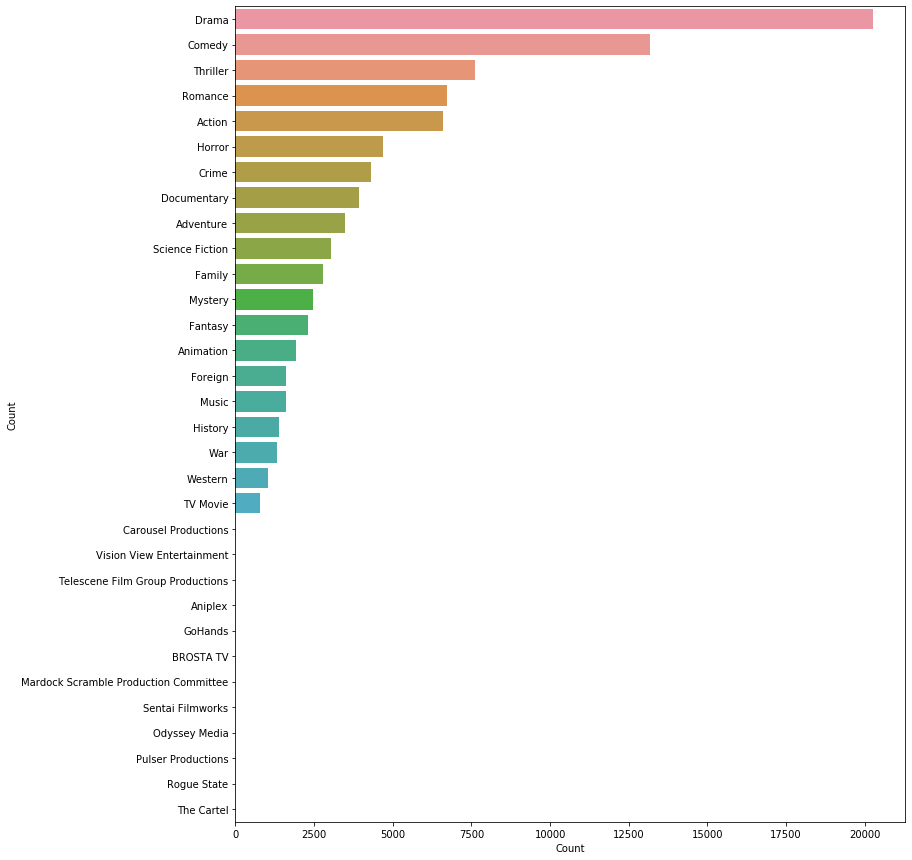

In [97]:
import matplotlib.pyplot as plt 
import seaborn as sns
all_genres = nltk.FreqDist(all_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

### lets see the rows where title is different from original title 

In [110]:
movie_data[movie_data['original_title']!=movie_data['title']]

,genres,original_title,overview,tagline,title,Overview_Combined
28,"[Fantasy, Science Fiction, Adventure]",La Cité des Enfants Perdus,A scientist in a surrealist society kidnaps ch...,Where happily ever after is just a dream.,The City of Lost Children,A scientist in a surrealist society kidnaps ch...
29,"[Drama, Crime]",摇啊摇，摇到外婆桥,A provincial boy related to a Shanghai crime f...,In 1930's Shanghai violence was not the proble...,Shanghai Triad,A provincial boy related to a Shanghai crime f...
32,"[Romance, Adventure]","Guillaumet, les ailes du courage",NaN,,Wings of Courage,NaN
57,"[Comedy, Drama, Romance]",Il postino,Simple Italian postman learns to love poetry w...,,The Postman,Simple Italian postman learns to love poetry w...
58,"[Thriller, Drama, Mystery]",Le confessionnal,"The year is 1952, in Quebec City. Rachel (16),...",,The Confessional,"The year is 1952, in Quebec City. Rachel (16),..."
67,"[Comedy, Romance]",Gazon maudit,"After learning of her husband's infidelities, ...",,French Twist,"After learning of her husband's infidelities, ..."
72,"[Drama, History]",Les misérables,"In France during World War II, a poor and illi...","In a time of chaos, in a world of change, he w...",Les Miserables,"In France during World War II, a poor and illi..."
79,"[Family, Drama]",بادکنک سفید,Several people try to take advantage of a litt...,,The White Balloon,Several people try to take advantage of a litt...
81,"[Drama, Comedy]",Antonia,"After World War II, Antonia and her daughter, ...",A motion picture that celebrates everything yo...,Antonia's Line,"After World War II, Antonia and her daughter, ..."
104,"[Drama, Comedy, Family]",Keiner liebt mich,No overview found.,,Nobody Loves Me,No overview found.


## observation
1. The title column  has names in english and orginal has names in different languages. For working we will take title column  

In [111]:
# We will drop the rows where there is no overview i.e contains null value 
movie_data['Overview_Combined'].isnull().sum()

697

In [112]:
movie_data.shape

(43024, 6)

In [114]:
movie_data = movie_data[pd.notnull(movie_data['Overview_Combined'])]
movie_data.shape

(42327, 6)

In [118]:
# creating new data frame with overview combined column
movies_new=movie_data.drop('overview',axis=1)

### Creating a function to clean our combined overview text column.

In [117]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [121]:
movies_new['overview_cleaned'] = movies_new['Overview_Combined'].apply(lambda x: clean_text(x))

In [122]:
movies_new.head()

,genres,original_title,tagline,title,Overview_Combined,overview_cleaned
0,"[Animation, Comedy, Family]",Toy Story,,Toy Story,"Led by Woody, Andy's toys live happily in his ...",led by woody andys toys live happily in his ro...
1,"[Adventure, Fantasy, Family]",Jumanji,Roll the dice and unleash the excitement!,Jumanji,When siblings Judy and Peter discover an encha...,when siblings judy and peter discover an encha...
2,"[Romance, Comedy]",Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,A family wedding reignites the ancient feud be...,a family wedding reignites the ancient feud be...
3,"[Comedy, Drama, Romance]",Waiting to Exhale,Friends are the people who let you be yourself...,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",cheated on mistreated and stepped on the women...
4,[Comedy],Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,Just when George Banks has recovered from his ...,just when george banks has recovered from his ...


## Lets see the most frequent words in the documents 

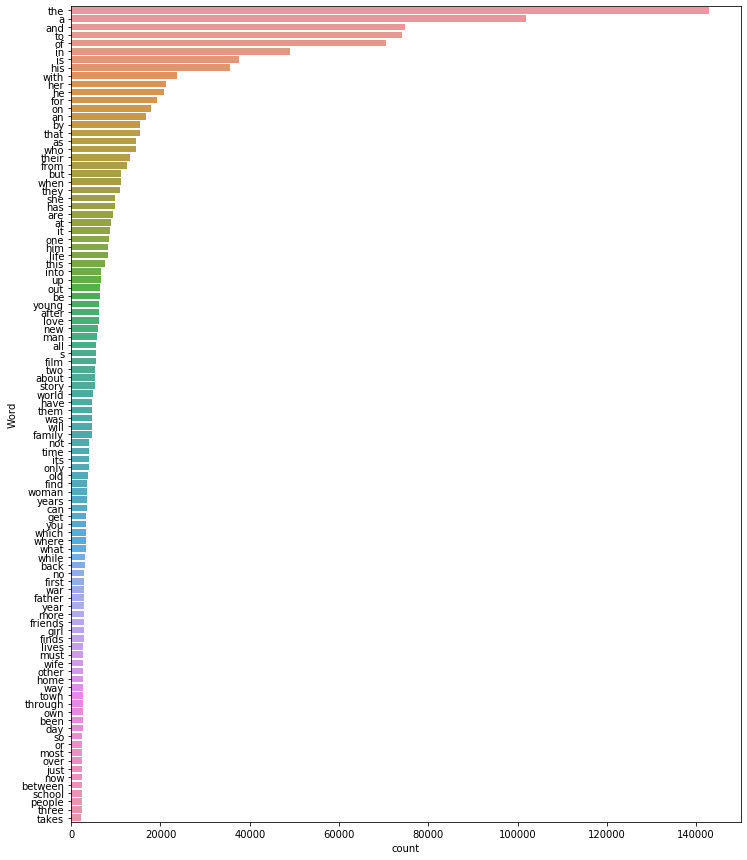

In [123]:
# creating a function for that 
def freq_words(x, terms = 30): 
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
    fdist = nltk.FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
    # selecting top most frequent words 
    d = words_df.nlargest(columns="count", n =terms) 
  
    # visualize words and frequencies
    plt.figure(figsize=(12,15)) 
    ax = sns.barplot(data=d, x= "count", y = "word") 
    ax.set(ylabel = 'Word') 
    plt.show()
# print 100 most frequent words 
freq_words(movies_new['overview_cleaned'], 100)

## It can be seen that these are the stop words which are most frequent and these dont make much sense . 

1. So we will remove the stop words using nltk stopwords.


In [124]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [125]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

movies_new['overview_cleaned'] = movies_new['overview_cleaned'].apply(lambda x: remove_stopwords(x))

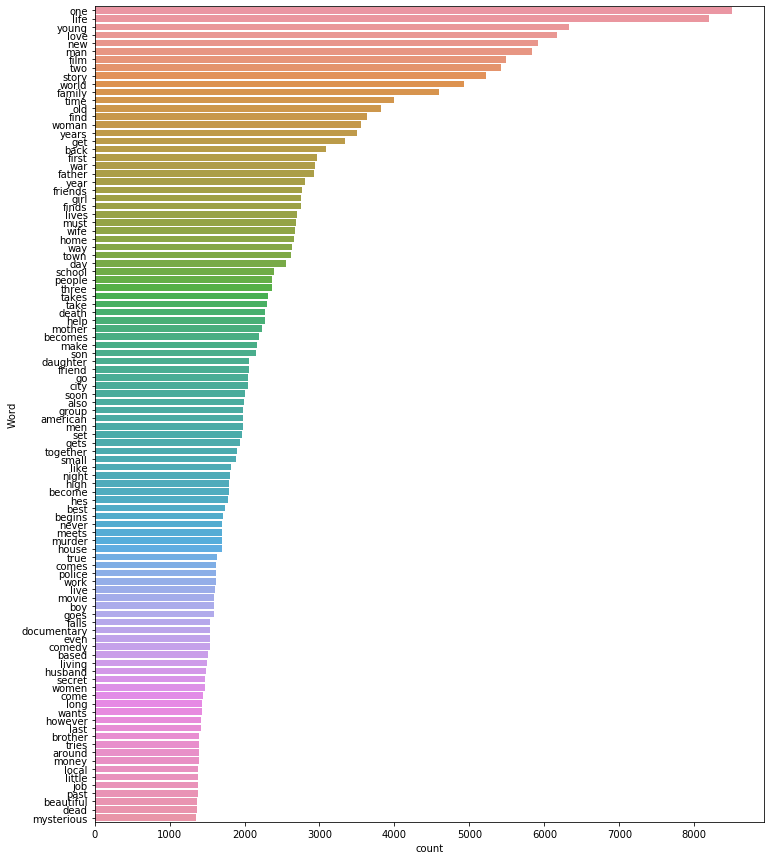

In [126]:
freq_words(movies_new['overview_cleaned'], 100)

## This makes much more sense now

1. We have cleaned text .


## Our Target genre has more than one tags for a movie so this is a  Multilabel classification problem.

1. We saw that there were 32 unique genre tags 
2. our target will be divided into 32 targets having values as 0 or one 
3. In this way The multilabel classification problem can be approached by using Binary relevance.

### we will now one hot encode the target variable, i.e., genres by using sklearn’s MultiLabelBinarizer( ). 
1. Since there are 32 unique genre tags, there are going to be 32 new target variables

In [127]:
# We will convert text into features
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(movies_new['genres'])

# transform target variable
y = multilabel_binarizer.transform(movies_new['genres'])

In [130]:
# importing libraries for model building,evaluation and split
from sklearn.linear_model import LogisticRegression
#  Binary Relevance
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [133]:
# split dataset into training and validation set

xtrain, xval, ytrain, yval = train_test_split(movies_new['overview_cleaned'], y, test_size=0.2, random_state=9)

In [134]:
# create TF-IDF features

xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

### Function for model building 

In [155]:
def model_building(X, Y, test, model,params,k) :
    
       
        model_cv = GridSearchCV(model,param_grid=params, cv = k)
        
        ## Fit model_cv using 
        model_cv.fit(X, Y)
        
        ## check best estimator 
        model = model_cv.best_estimator_

        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

### Function for model evaluation

In [179]:
def model_evaluation(y_train, pred_train, y_val,pred_val) :
    
    print('''
             =========================================
                F1 SCORE FOR TRAIN DATA
             =========================================''')
    print("SCORE : ", f1_score(y_train, pred_train,average="micro"))
    
    print('''
             =========================================
             
                 F1 SCORE FOR Validation DATA
             =========================================''')
    print("SCORE : ", f1_score(y_val,pred_val,average="micro"))

In [180]:
lr = LogisticRegression()
LR = OneVsRestClassifier(lr)

dt=DecisionTreeClassifier()
DT=OneVsRestClassifier(dt)

ab=AdaBoostClassifier()
AB=OneVsRestClassifier(ab)

rf=RandomForestClassifier()
RF=OneVsRestClassifier(rf)

gb=GradientBoostingClassifier()
GB=OneVsRestClassifier(gb)

xgb=XGBClassifier()
XGB=OneVsRestClassifier(xgb)
sv=SVC()
SV=OneVsRestClassifier(sv)

In [181]:
# Creating a list with models and their parameters
# skip warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

estimators = [(DT,{'estimator__max_depth' : range(1,10), 
                                      'estimator__min_impurity_decrease' : [0.0001, 0.01]})]


In [182]:
for estimator, parameters in estimators:
    
    model_cv, model, pred_train, pred_test = model_building(xtrain_tfidf, ytrain,
                                                            xval_tfidf, estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(ytrain, pred_train, yval, pred_test)

			 OneVsRestClassifier 

{'estimator__max_depth': 9, 'estimator__min_impurity_decrease': 0.0001} 



                F1 SCORE FOR TRAIN DATA
SCORE :  0.38370335811434425

             
                 F1 SCORE FOR Validation DATA
SCORE :  0.3356066484256953


In [183]:
estimators= [(AB,{'estimator__n_estimators' : [10,25,50], 
                                      'estimator__learning_rate' : [0.1]})]
for estimator, parameters in estimators:
    
    model_cv, model, pred_train, pred_test = model_building(xtrain_tfidf, ytrain,
                                                            xval_tfidf, estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(ytrain, pred_train, yval, pred_test)

			 OneVsRestClassifier 

{'estimator__learning_rate': 0.1, 'estimator__n_estimators': 50} 



                F1 SCORE FOR TRAIN DATA
SCORE :  0.22417092211070025

             
                 F1 SCORE FOR Validation DATA
SCORE :  0.22023949283869454


In [184]:
estimators= [(RF, {'estimator__n_estimators' : [ 25, 50], 
                                          'estimator__max_depth' : [ 14, 16, 18], 
                                           'estimator__min_samples_leaf' : [5, 10]})]
for estimator, parameters in estimators:
    
    model_cv, model, pred_train, pred_test = model_building(xtrain_tfidf, ytrain,
                                                            xval_tfidf, estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(ytrain, pred_train, yval, pred_test)


			 OneVsRestClassifier 

{'estimator__max_depth': 18, 'estimator__min_samples_leaf': 5, 'estimator__n_estimators': 25} 



                F1 SCORE FOR TRAIN DATA
SCORE :  0.1895407291717507

             
                 F1 SCORE FOR Validation DATA
SCORE :  0.16661754592789074


In [188]:
estimators=[(LR,{'estimator__penalty':['l2']})]
for estimator, parameters in estimators:
    
    model_cv, model, pred_train, pred_test = model_building(xtrain_tfidf, ytrain,
                                                            xval_tfidf, estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(ytrain, pred_train, yval, pred_test)


			 OneVsRestClassifier 

{'estimator__penalty': 'l2'} 



                F1 SCORE FOR TRAIN DATA
SCORE :  0.5737242996600557

             
                 F1 SCORE FOR Validation DATA
SCORE :  0.4840518361739259


## It is visible that Logistic Regression is giving the best scores 

In [201]:
# Lets change the threshold from 0.5 to 0.3 and see the scores
y_pred_prob = model_cv.predict_proba(xval_tfidf)

In [202]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [203]:
f1_score(yval, y_pred_new, average="micro")

0.5895587778060432

### It can be seen that the validation score has gone up from 48 to 58 by putting threshold 0.3 . It is a big leap 

## let’s build an inference function. It will take a movie plot text and perform functions like 

1. cleaning the text
2. Remove stopwords from the cleaned text
3. Extract features from the text
4. Make predictions
5. Return the predicted movie genre tags


In [206]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = model_cv.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [207]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", movies_new['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",movies_new['genres'][k], "\n")

Movie:  I Hired a Contract Killer 
Predicted genre:  [('Drama',)]
Actual genre:  ['Comedy', 'Drama'] 

Movie:  The End of the Tour 
Predicted genre:  [('Drama',)]
Actual genre:  ['Drama'] 

Movie:  Kuka 
Predicted genre:  [('Drama',)]
Actual genre:  ['Romance', 'Drama'] 

Movie:  The Ex 
Predicted genre:  [('Comedy', 'Drama')]
Actual genre:  ['Comedy', 'Romance'] 

Movie:  God's Comedy 
Predicted genre:  [('Comedy',)]
Actual genre:  ['Comedy', 'Drama'] 



### Our genre prediction is working decent and giving good results.


## Another approach to solve this problem could be

1. Use the glove file to vectorise and create feature.
2. Use Deep learning model to make predictions.